# 09 Introduction to Plotting, Part 2
File(s) needed: none

데이터를 그래프로 시각화하는 것은 데이터 분석에 있어서 상당히 중요한 부분입니다. 설명적 통계수치들은 이러한 전체 그림을 보여주지 않기 때문에 더더욱 이러한 시각화가 중요합니다.

이번 차트에서 사용할 시각화 기법들:
- matplotlib
- Seaborn
- basic plots included in pandas



# Seaborn graphics
`matplotlib` 라이브러리는 파이썬의 핵심 기초 plotting 도구입니다. 우리는 이러한 `matplotlib`에 기반하여 한 단계 높은 수준의 인터페이스를 제공하는 `seaborn` 라이브러리를 이번 파트에서 배워보겠습니다. 좀 더 전문적인 plot을 다루기 때문에 설명적(explanatory) plotting에 더 유용합니다.

From the Seaborn documentation:
>Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

https://seaborn.pydata.org/index.html


In [3]:
# import the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# load a copy of the tips dataset
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Bar charts

카테고리형 데이터의 경우, seaborn라이브러리는 `countplot()`이라는 메소드를 제공합니다. 이 메소드는 특정 컬럼의 value를 카운트하고 frequencies에 기반하여 막대 그래프를 표시합니다.

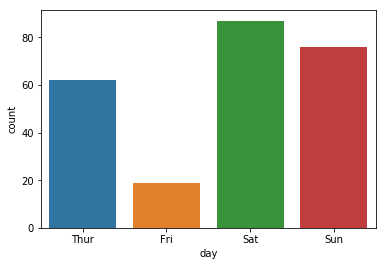

In [2]:
sns.countplot(x = 'day', data = tips )
plt.show()

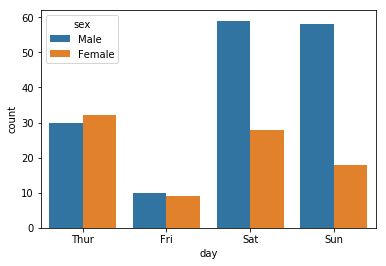

In [4]:
# hue parameter를 추가하여 여러개의 막대를 표시할 수도 있습니다.
sns.countplot(x = 'day', hue = 'sex', data = tips )
plt.show()

### Scatter plot with regression line

`lmplot()`을 사용하면 `hue` 와 `col` parameters를 사용하여 그래프를 그릴 수 있습니다. `hue` 는 새로운 변수를 다른 색상을 이용하여 추가하는 파라미터이고, `col`은 별도의 새로운 plot으로 분할하는 데 사용되는 파라미터입니다.

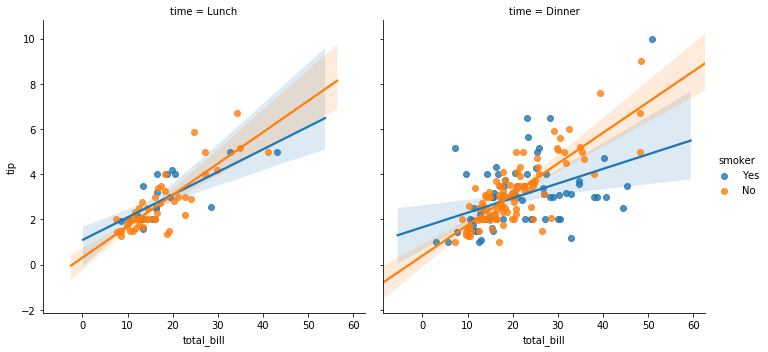

In [11]:
# Scatter plot with hue and col
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = tips)
plt.show()

### Figure level versus axes level

위 plot은 seaborn에서 "figure-level"이라고 부르는 기능입니다. 위와 같이 다양한 파라미터를 이용함으로써 figure-level 기능은 분석하기 위한 그래프를 그릴 때 범례를 추가하는 것과 같은 방법으로 유용하게 사용됩니다. 

Seaborn은 지난번 우리가 했던 `subplots` 프로세스같은 과정을 사용하고 있습니다. (FacetGrid라는 기능으로) FacetGrid은 큰 전체적인 figure-level 객체를 제어한다는 점을 알아두고 갑시다.


FacetGrid에는 하나 이상의 axes 레벨 개체가 있습니다. axes는 실제 plot을 보유할 수 있는 오브젝트라고 생각하면 됩니다. 

이러한 오브젝트를 사용하는 방법 중 하나는 figure level 오브젝트와 axes-level 오브젝트를 만든 다음 개별적으로 처리하는 것입니다. 


## Histograms, Density Plots, and Rug Plots

`sns.distplot`기능은 seaborn 라이브러리에 내장된 function입니다. 이는 히스토그램과 커널 밀도추정 plot 및 다른 특징들을 포함한 펑션입니다.

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법입니다.

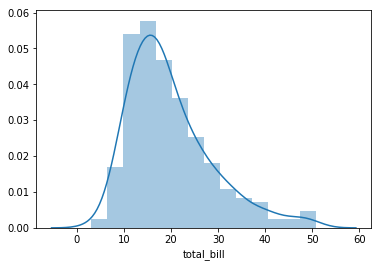

In [12]:
sns.distplot(tips['total_bill'])

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

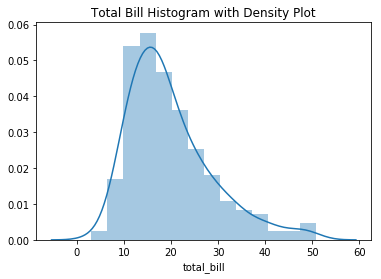

In [6]:
# Histogram in seaborn
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

- 기본 distplot은 히스토그램과 커널 밀도 그래프를 모두 표시합니다
- `kde` parameter를 `False`로 지정해서 히스토그램만 확인할 수도 있습니다.

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

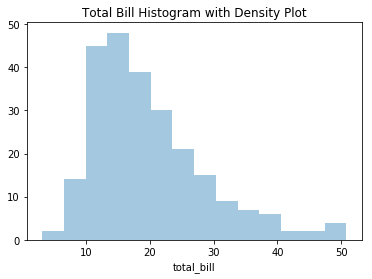

In [8]:
# Histogram only, add descriptive titles
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram with Density Plot')

### Density Plot (Kernel Density Estimation)
- Density plots은 univariate변수를 시각화 하는 다른 방법입니다.
- 이는 각 데이터 점들을 중심으로 정규분포를 그린 다음, 곡선 아래 영역이 1이 되도록 만드는 Plot입니다.
- 이전에 사용한 `sns.distplot` 과 `hist=False`를 설정해줍니다.
- `sns.displot` 대신  `sns.kdeplot` function을 사용해도 됩니다.

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

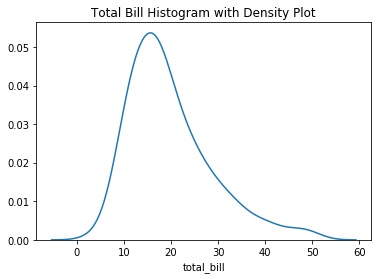

In [9]:
# density plot only
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Total Bill Histogram with Density Plot')

### Rug plot
- Rug plots은 변수들의 분포를 1차원으로 나타낸 plot입니다.
- 우리는 `distplot` function을 이용해 히스토그램과 밀도함수그래프, rug plot까지 한번에 표현해보겠습니다

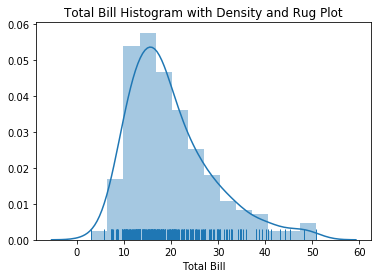

In [11]:
# rug plot
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')
plt.show()

## Bivariate data

### Scatterplot
- scatterplot라는 이름의 function은 Seaborn 라이브러리에는 없습니다.
- 대신, `regplot` 혹은 `lmplot` 을 사용해줍니다.
    - 두개의 function 모두 산점도에 회귀직선이 그려진 그래프를 만들어줍니다.
    - `fit_reg=False` 라고 설정하면 회귀직선없이 산점도만 만들 수 있습니다.
- 두개의 function의 차이점:
    - regplot은 axes를 만듭니다. - 즉 원한다면 커스터마이징을 할 수 있습니다.
    - lmplot 은 figure를 만듭니다

Text(0, 0.5, 'Tip')

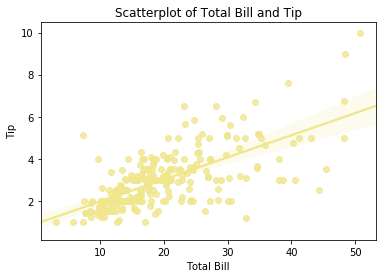

In [15]:
# Scatterplot with regression line using regplot
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips, color = 'khaki')
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')


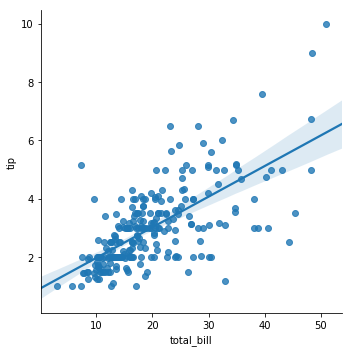

In [21]:
# Scatterplot with regression line using lmplot
fig = sns.lmplot(x='total_bill',y='tip',data=tips)


### Hexbin plot
Scatterplot은 변수 두개를 비교하는데 상당히 좋은 plot이지만 가끔은 scatterplot이 담기에 너무 많은 정보를 포함하고 있는 경우가 있습니다. hexbin plot은 이러한 점들을 감소시켜주는 경향이 있습니다.

A hexagon is used for this purpose because it is the most efficient shape to cover an arbitrary 2D surface

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

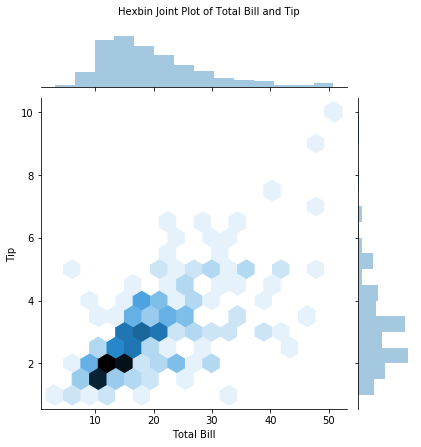

In [13]:
# Hexbin and histogram joint plot
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

### Box and whiskers plot
-  boxplots show multiple statistics
    - minimum
    - first quartile
    - median
    - third quartile
    - maximum
    - outliers based on the interquartile range (if applicable)

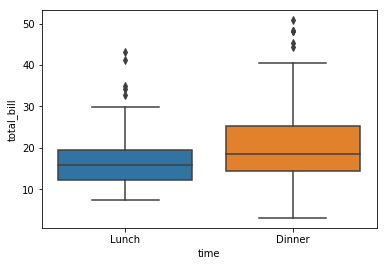

In [14]:
# Box plot
box, ax = plt.subplots()

# y parameter is optional for multiple plots in one figure
ax = sns.boxplot(x = 'time', y = 'total_bill', data = tips)

### Pairwise relationships
- 모든 숫자 변수들 간의 관계를 Pairplot을 이용하여 쉽게 보여줄 수 있습니다.
- 각 변수 들의 산점도와 대각선에 있는 변수들의 히스토그램을 보여줍니다.

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


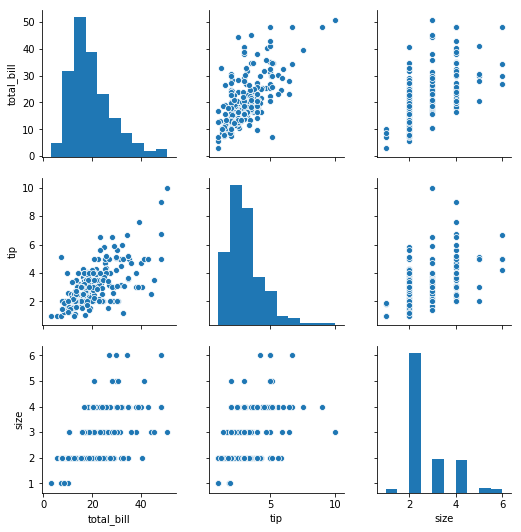

In [27]:
# pairwise plots
fig = sns.pairplot(tips)

- 대각선 위와 아래는 같은 시각화 차트입니다.
- Pairgrid를 사용하여 아래 혹은 위 겹치는 부분을 수동으로 다른 모양의 차트로 바꿔 줄 수 있습니다

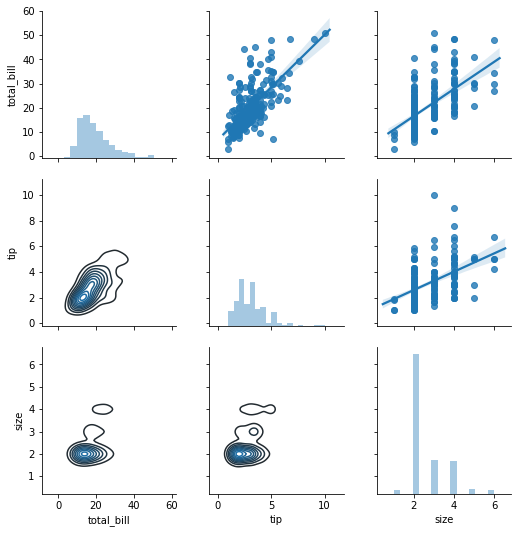

In [35]:
# tips데이터를 pairgrid로 만들어줍니다.
pair_grid = sns.PairGrid(tips)
# 오른쪽 위는 regplot으로 회귀직선 및 산점도 그래프
# 왼쪽 아래는 kdeplot 으로 밀도그래프
# 가운데 겹치는 부분은 distplot 으로 히스토그램을 만들어줍니다.
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, kde = False)

# Multivariate data
- 이전 파트에도 다뤘듯이, 두개 이상의 변수를 차트에 넣으려면 차트에 다른 특징들을 넣어주어야 합니다.

    - color - use the `hue` parameter
    - size - use the `size` parameter
    - shape - use the `markers` parameter

## Colors

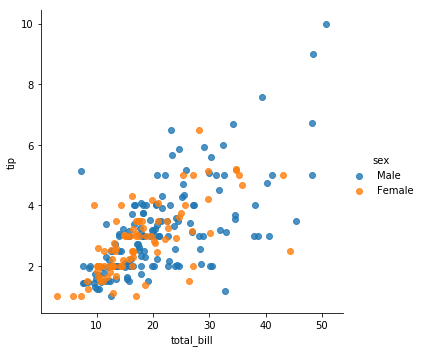

In [18]:
# 색깔은 산점도 내에 여러 그룹을 만들어 표현하고 싶을 때 사용합니다.
# regplot은 hue parameter가 없기 때문에 lmplot을 사용해봅시다.
scatter = sns.lmplot(x ='total_bill' , y = 'tip', hue = 'sex', data = tips, fit_reg = False)

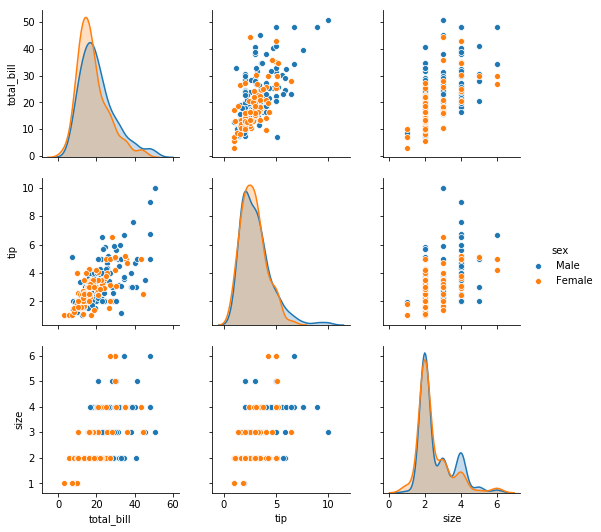

In [49]:
# 방금 사용했던 pairplot에도 hue 파라미터를 사용할 수 있습니다.
fig = sns.pairplot(tips, hue = 'sex')

## Size and shape
- 각 점들의 사이즈를 조정해 더 많은 정보를 추가할 수도 있습니다.
- 하지만 이런 점들은 애매모호해서 사람의 눈으로는 정확히 구분하기 힘듭니ㅏㄷ.

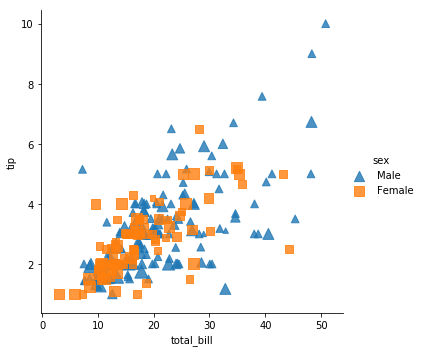

In [25]:
# scatter_kws 는 size를 조절하기 위한 파라미터입니다.
# 색깔과 모양을 다르게 해서 sex 값을 표현했습니다
# hue 파라미터는 이러한 세번째 변수인 sex를 색깔을 통해 나타낸것입니다.
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips,
                     fit_reg = False, hue = 'sex',
                     markers = ['^','s'],
                    scatter_kws = {'s':tips['size']*30})


### Facets
Seaborn은 앞서 본 subplot과 유사한, 하나의 데이터셋에서 여러 그래프를 그리는 것을 할 수 있습니다. 여기서 다른 점은 우리가 각 개별 plot을 나누지 않는다는 것입니다.

우리가 앞서 이전 파트에서 했던 subplot을 lmplot을 이용해 만들어보겠습니다

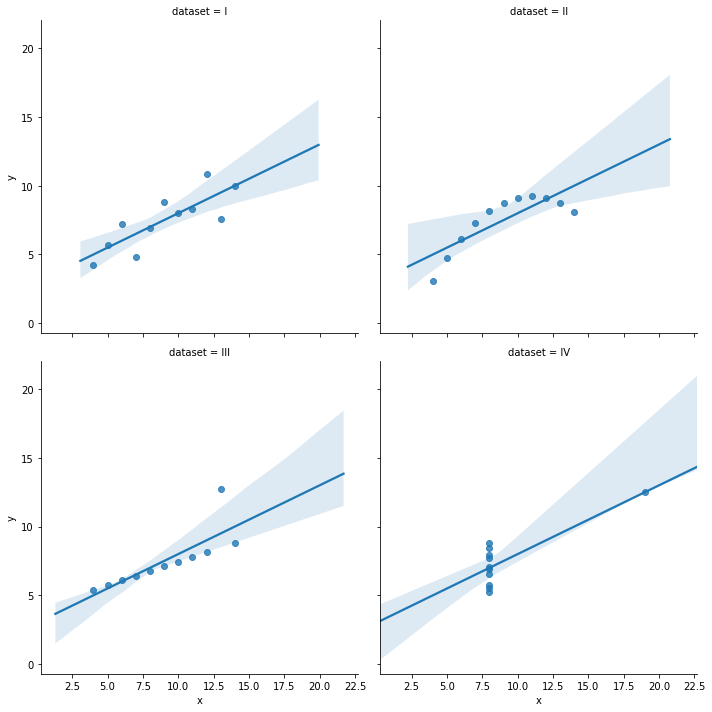

In [27]:
# Anscombe plots using seaborn

anscombe = sns.load_dataset("anscombe")
anscombe_plot = sns.lmplot(x = 'x', y = 'y', data = anscombe, col = 'dataset', col_wrap = 2)


`FacetGrid`를 사용해서 더 많은 멀티플롯을 만들어 커스터마이징할 수 있습니다. `lmplot` function 은 figure-level function 이라서 `col` 과 `col_wrap` parameter를 가집니다. Axes level functions인 `regplot`은 위의 파라미터를 갖고있지 않아서 grid를 통해 subplot을 만들어주어야 합니다.
